# **What's your EDA? | Exploratory Data Analysis III**

---



In this part of the workshop, we finally move into Data Visualizations! Each of the segments below correspond to the charts executed on the slides during the workshop. Be sure to follow along for more information on logic, syntax and further explanations. Make sure to have the pandas, seaborn and matplotlib libraries installed in your environment to facilitate a smooth flow during the workshop.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

employees=pd.read_csv("employee_cleaned.csv")

# Why do you need Visualization?

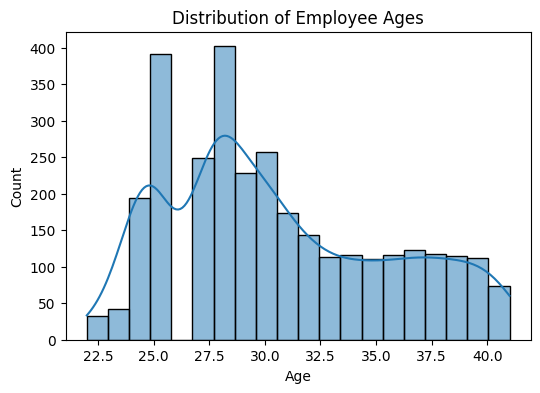

In [2]:
# Distribution of Employee Ages
plt.figure(figsize=(6,4))
sns.histplot(employees["Age"], bins = 20 , kde = True)
#kde=Kernel Density Estimation=smooth continuous line (pdf of the data) on the histogram
plt.title("Distribution of Employee Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

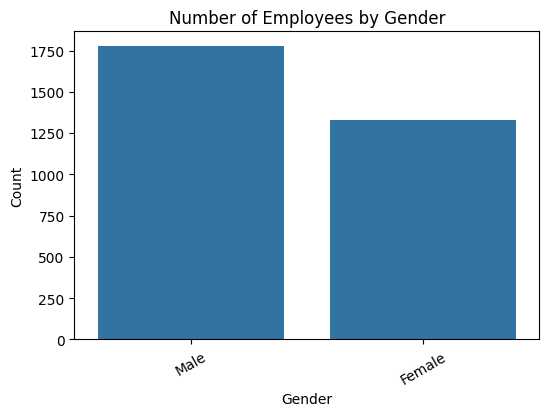

In [3]:
# Countplot of Gender
plt.figure(figsize=(6,4))
sns.countplot(x="Gender",data=employees,order=employees["Gender"].value_counts().index)
plt.title("Number of Employees by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

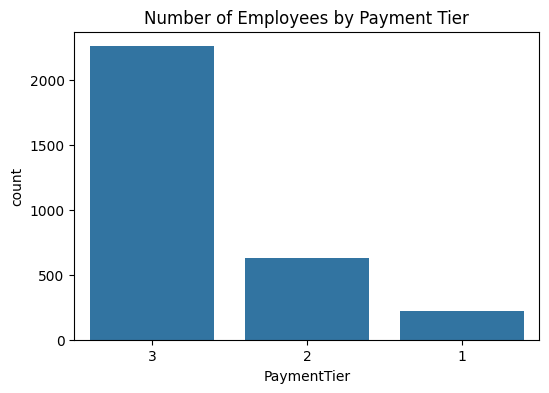

In [4]:
# Payment Tier Counts
plt.figure(figsize=(6,4))
sns.countplot(x="PaymentTier",data=employees,order=employees["PaymentTier"].value_counts().index)
plt.title("Number of Employees by Payment Tier")
plt.show()

# Choosing the RIght Visual

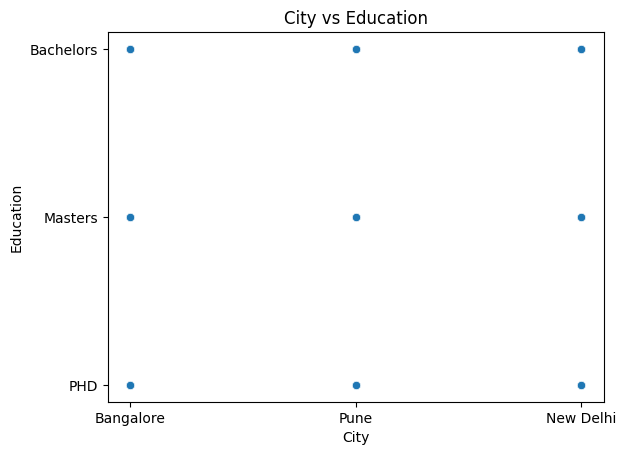

In [24]:
# scatterplot of city vs education
sns.scatterplot(x="City",y="Education",data=employees)
plt.title("City vs Education")
plt.show()

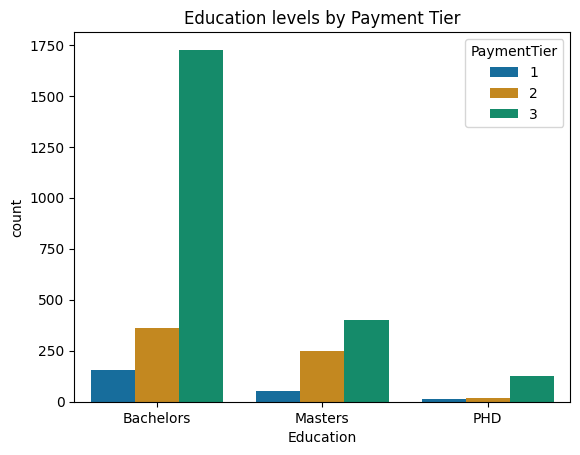

In [23]:
# grouped barplot of education across payment tier
sns.countplot(x="Education",hue="PaymentTier",data=employees,palette="colorblind")
plt.title("Education levels by Payment Tier")
plt.show()

## All about the Visuals

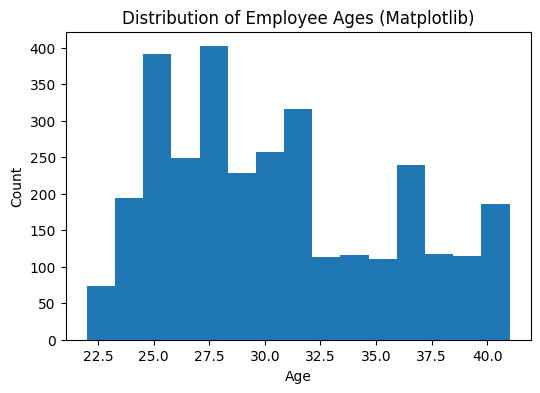

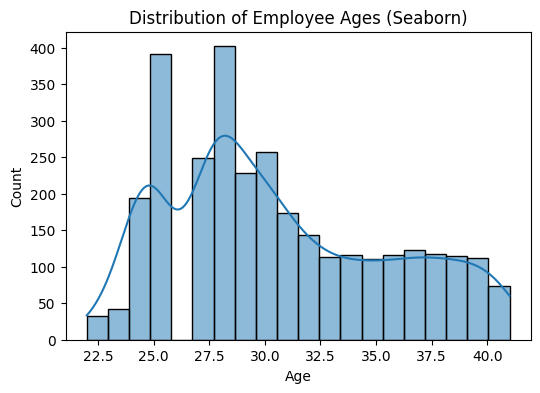

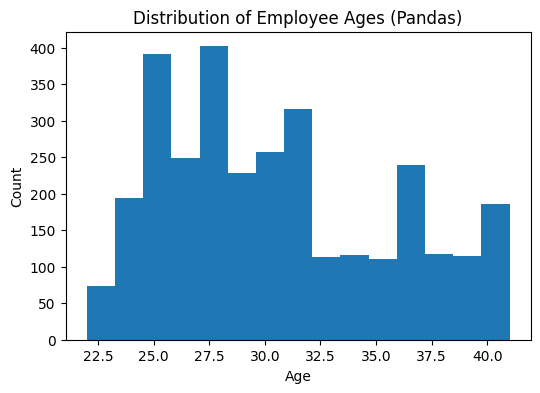

In [7]:
# matplotlib show
plt.figure(figsize=(6,4))
plt.hist(employees["Age"], bins=15)#, color="skyblue", edgecolor="black")
plt.title("Distribution of Employee Ages (Matplotlib)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# seaborn show
plt.figure(figsize=(6,4))
sns.histplot(employees["Age"], kde=True)
plt.title("Distribution of Employee Ages (Seaborn)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# pandas show
employees["Age"].plot(kind="hist", bins=15, figsize=(6,4))#, color="skyblue", edgecolor="black")
plt.title("Distribution of Employee Ages (Pandas)")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

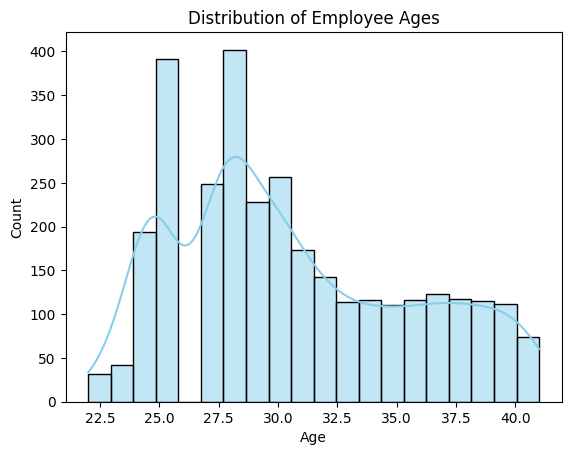

In [8]:
# Histogram

sns.histplot(employees["Age"], kde=True, color="skyblue")
plt.title("Distribution of Employee Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

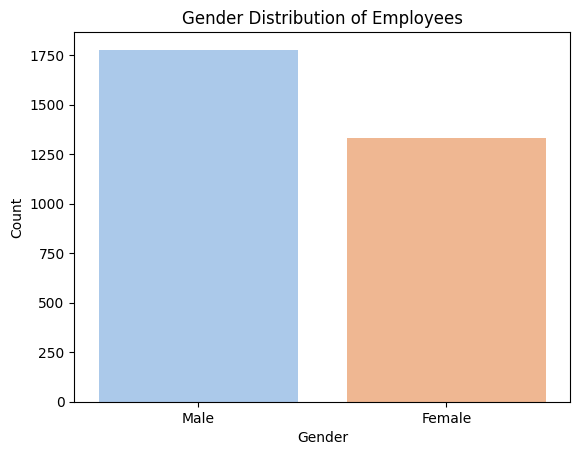

In [9]:
# Bar Chart

sns.countplot(x="Gender", data=employees, palette="pastel", hue="Gender")
plt.title("Gender Distribution of Employees")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

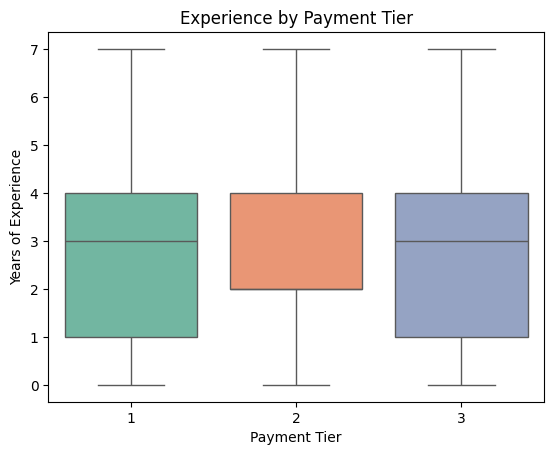

In [10]:
# Boxplot

sns.boxplot(x="PaymentTier", y="ExperienceInCurrentDomain", data=employees, palette="Set2", hue="PaymentTier", legend=False)
plt.title("Experience by Payment Tier")
plt.xlabel("Payment Tier")
plt.ylabel("Years of Experience")
plt.show()

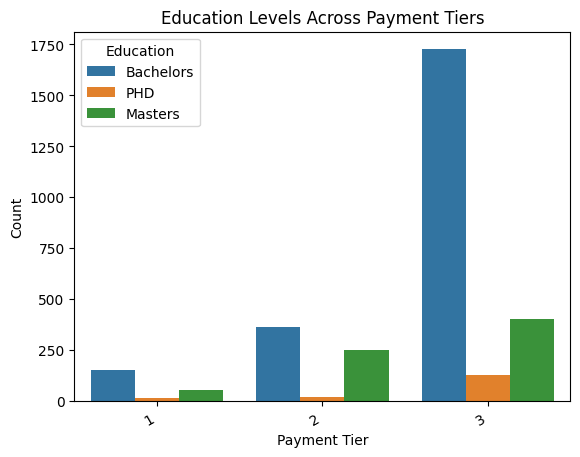

In [11]:
# Grouped Barplot

sns.countplot(x="PaymentTier", hue="Education", data=employees)
plt.title("Education Levels Across Payment Tiers")
plt.xlabel("Payment Tier")
plt.ylabel("Count")
plt.xticks(rotation=30, ha="right")
plt.show()

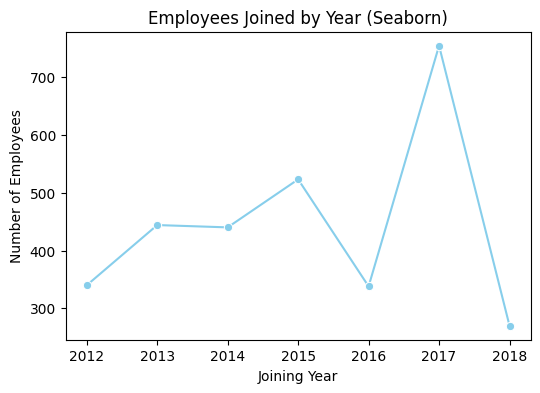

In [21]:
# Line Plot

employees_per_year = employees["JoiningYear"].value_counts().sort_index()
plt.figure(figsize=(6,4))
sns.lineplot(x=employees_per_year.index, y=employees_per_year.values, marker="o", color="skyblue") #.index --> access index of the series=JoiningYear; .values --> access the values of series=count of employees for each JoiningYear
plt.title("Employees Joined by Year (Seaborn)")
plt.xlabel("Joining Year")
plt.ylabel("Number of Employees")
plt.show()

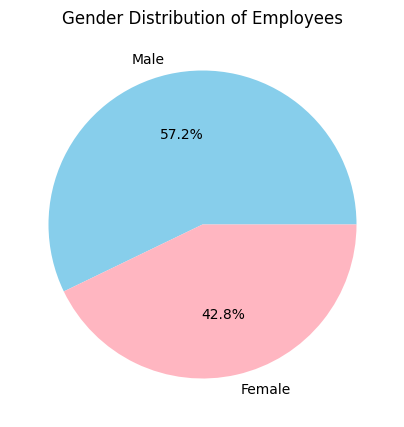

In [13]:
# Pie Chart

gender_counts = employees["Gender"].value_counts()
plt.figure(figsize=(5,5))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["skyblue","lightpink"])
plt.title("Gender Distribution of Employees")
plt.show()

# Formatting for Clarity

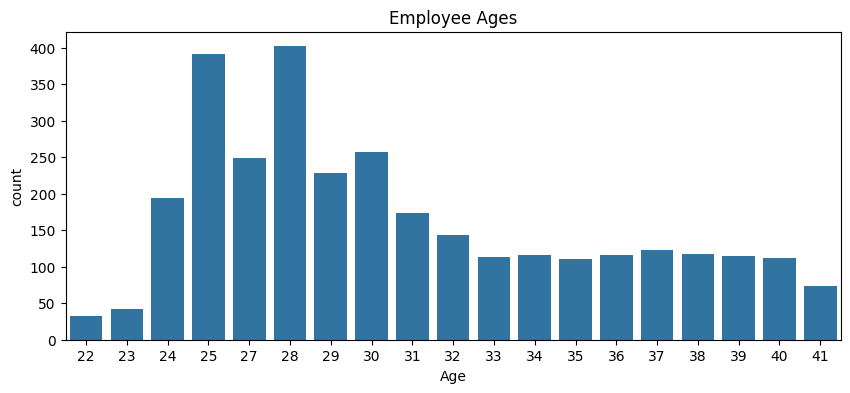

In [14]:
plt.figure(figsize=(10,4))
sns.countplot(x="Age", data=employees)
plt.title("Employee Ages")
plt.show()

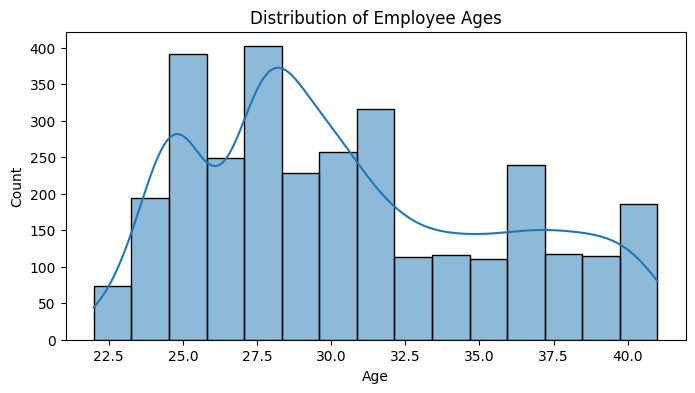

In [15]:
plt.figure(figsize=(8,4))
sns.histplot(employees["Age"], bins=15, kde=True)
plt.title("Distribution of Employee Ages")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Building a Story

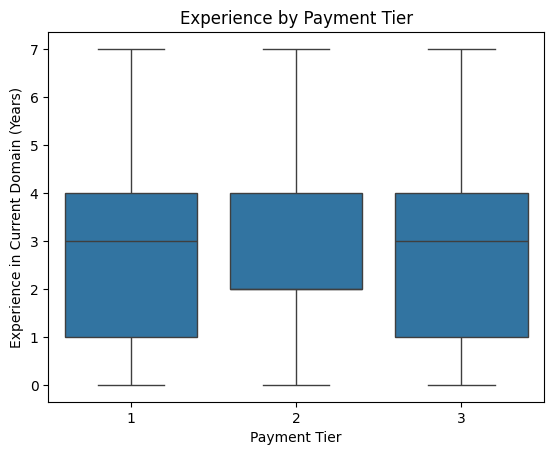

In [16]:
sns.boxplot(x='PaymentTier', y='ExperienceInCurrentDomain', data=employees)
plt.title("Experience by Payment Tier")
plt.xlabel("Payment Tier")
plt.ylabel("Experience in Current Domain (Years)")
plt.show()

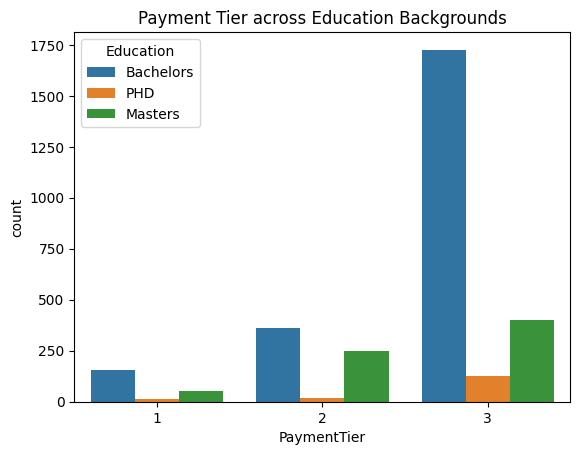

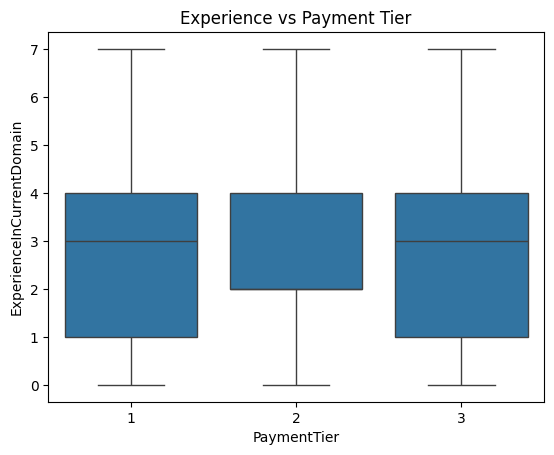

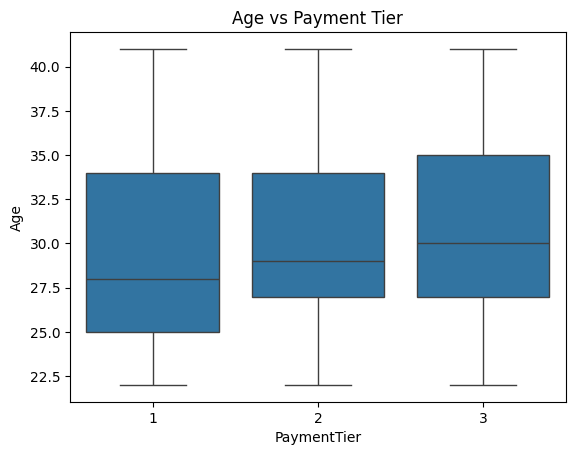

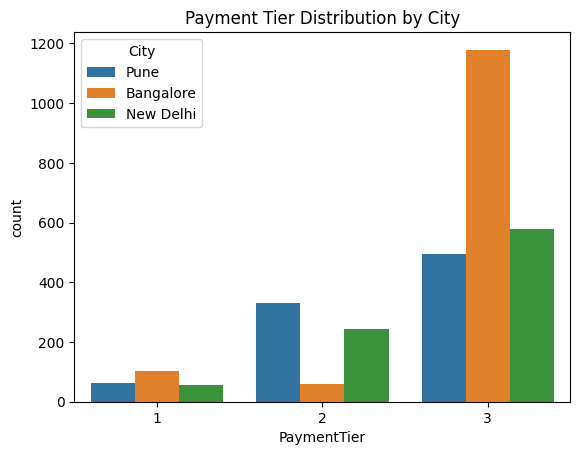

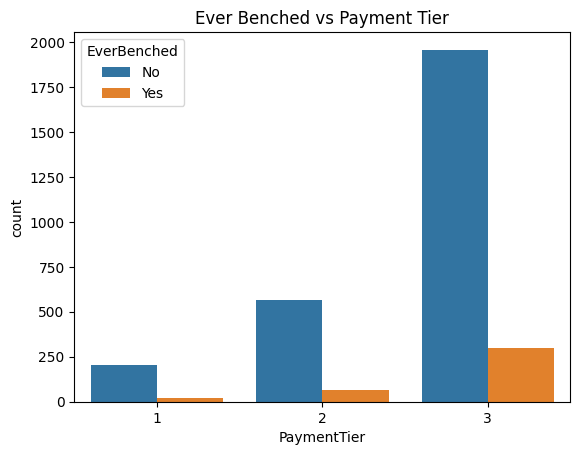

In [25]:
# plots to check which variables influence PaymentTier (if any)

sns.countplot(x="PaymentTier", hue="Education", data=employees)
plt.title("Payment Tier across Education Backgrounds")
plt.show()

sns.boxplot(x="PaymentTier", y="ExperienceInCurrentDomain", data=employees)
plt.title("Experience vs Payment Tier")
plt.show()

sns.boxplot(x="PaymentTier", y="Age", data=employees)
plt.title("Age vs Payment Tier")
plt.show()

sns.countplot(x="PaymentTier", hue="City", data=employees)
plt.title("Payment Tier Distribution by City")
plt.show()

sns.countplot(x="PaymentTier", hue="EverBenched", data=employees)
plt.title("Ever Benched vs Payment Tier")
plt.show()

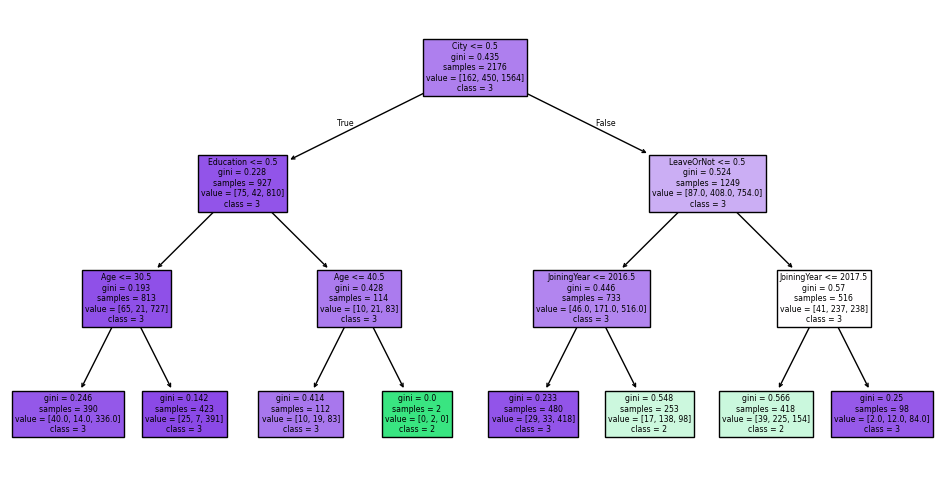

JoiningYear                  0.470182
City                         0.347849
LeaveOrNot                   0.143394
Education                    0.022647
Age                          0.015928
Gender                       0.000000
EverBenched                  0.000000
ExperienceInCurrentDomain    0.000000
dtype: float64


In [26]:
# very basic ML model to verify hypothesis

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Encode categorical features
df_enc = employees.copy()
for col in ["Education", "City", "Gender", "EverBenched"]:
    df_enc[col] = LabelEncoder().fit_transform(df_enc[col])

X = df_enc.drop("PaymentTier", axis=1)
y = df_enc["PaymentTier"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plot_tree(model, feature_names=X.columns, class_names=[str(c) for c in model.classes_], filled=True)
plt.show()

importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances)

# Visualization Interpretations

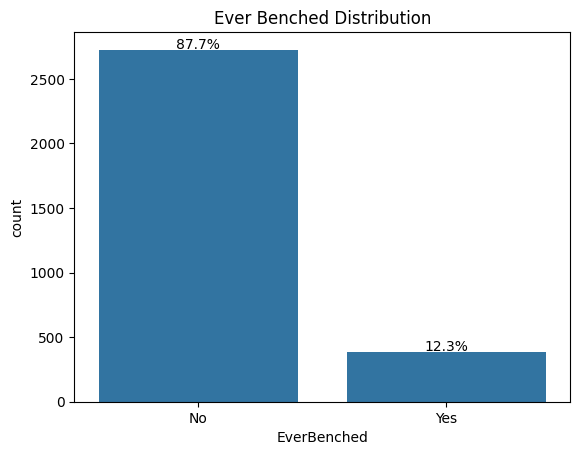

In [19]:
sns.countplot(x='EverBenched', data=employees)
plt.title("Ever Benched Distribution")

# Calculate percentage of Benched and Not Benched
total = len(employees)
yes_count = employees['EverBenched'].value_counts().get('Yes', 0)
no_count = employees['EverBenched'].value_counts().get('No', 0)
yes_percentage = (yes_count / total) * 100
no_percentage = (no_count / total) * 100

# Add text annotation for 'Yes'
plt.text(1, yes_count + 10, f'{yes_percentage:.1f}%', ha='center')

# Add text annotation for 'No'
plt.text(0, no_count + 10, f'{no_percentage:.1f}%', ha='center')

plt.show()

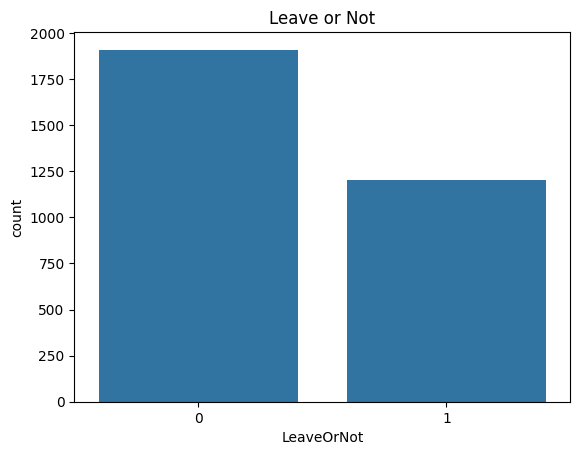

In [20]:
sns.countplot(x='LeaveOrNot', data=employees)
plt.title("Leave or Not")
plt.show()